In [18]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


**REQUIRED** **LIBRYERS**

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from numpy import random, float, array
from scipy.spatial.distance import cdist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Data Preprocessing 

In [20]:
Airline_data1 = pd.read_excel("EastWestAirlines.xlsx",sheet_name = "data")
Airline_data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
Airline_data1.shape

(3999, 12)

In [22]:
Airline_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# CHECKING FOR THE NULL VALUES 

In [23]:
Airline_data1.isnull()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
list(Airline_data1)

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [25]:
Airline_data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Normilization function

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

# Normalized data frame (considering the numerical part of data)

In [30]:
Airline_data1_norm = norm_func(Airline_data1.iloc[:, 1:])
Airline_data1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [31]:
Airline_data1.head(10)               # Top 10 rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


# How to find optimum number of  cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

importing kmeans

In [32]:
from sklearn.cluster import KMeans

# ELBOW CURVE
# by plotting elbow method we can decide which k is best

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airline_data1_norm)
    wcss.append(kmeans.inertia_)

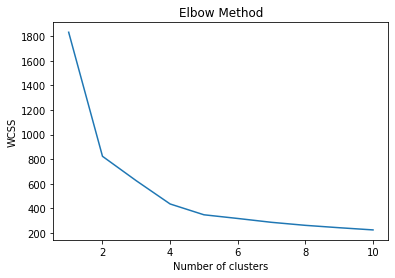

In [34]:
from matplotlib import pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
model=KMeans(n_clusters=5,n_init=30)
model.fit(Airline_data1_norm)
model.labels_

array([1, 1, 1, ..., 2, 4, 4], dtype=int32)

In [36]:
kmeans.inertia_

226.10985005074008

In [37]:
x=pd.Series(model.labels_)
Airline_data1['Clust']=x
Airline_data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [38]:
Airline_data1.iloc[:,1:5].groupby(Airline_data1.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Clust,,,,
0,83529.153046,290.453195,1.156018,1.032689
1,49921.633641,89.903226,1.122120,1.019585
2,108317.387376,198.336634,3.915842,1.001238
3,118297.325243,73.467638,3.584142,1.001618
4,33097.301357,94.131783,1.070736,1.016473


#Build Cluster algorithm

In [39]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=13)
clusters_new.fit(Airline_data1_norm)

KMeans(n_clusters=5, random_state=13)

In [40]:
clusters_new.labels_

array([3, 3, 3, ..., 4, 0, 0], dtype=int32)

#Assign clusters to the data set

In [42]:
Airline_data1['Y'] = clusters_new.labels_

In [43]:
Airline_data1.shape

(3999, 14)

In [44]:
Airline_data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust,Y
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,4


In [45]:
Airline_data1['Y'].value_counts()    

0    1032
3     868
4     808
1     673
2     618
Name: Y, dtype: int64

#these are standardized values.

In [46]:
clusters_new.cluster_centers_

array([[ 1.94103660e-02,  8.43565288e-03,  1.76669894e-02,
         8.22846079e-03,  1.69409487e-03,  1.23106384e-02,
         7.18386276e-02,  6.90024091e-03,  1.13792033e-02,
         2.40189960e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 2.92977490e-02,  8.07381776e-03,  3.05651672e-02,
         9.80392157e-03,  2.88350634e-04,  1.31422452e-02,
         8.03358279e-02,  7.92145051e-03,  1.37537812e-02,
         6.71326724e-01,  3.44169138e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
  

In [47]:
Airline_data1.groupby('Y').agg(['mean']).reset_index()

,Y,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,4.0
1,1,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,0.0
2,2,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,3.0
3,3,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,1.0
4,4,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2.0
